In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import xcorr

In [3]:
plt.rcParams.update({'font.size': 9})

In [4]:
root = '../datasets'

In [5]:
swresp = xr.open_dataset(f'{root}/swresp__IM.H03S[1-3]..EDH-IU.RAR.10.BH[RZ]__2014121__2020366__blockmean.nc')

In [6]:
swresp

<xarray.Dataset>
Dimensions:     (frequency: 626, pair: 3, phase: 81, selection: 2)
Coordinates:
  * frequency   (frequency) float64 0.0 0.04 0.08 0.12 ... 24.92 24.96 25.0
  * pair        (pair) object 'IM.H03S1..EDH-IU.RAR.10.BH[RZ]' ... 'IM.H03S3....
  * phase       (phase) float64 -1.0 -0.975 -0.95 -0.925 ... 0.95 0.975 1.0
  * selection   (selection) object 'all' 'eligible only'
Data variables:
    density     (pair, selection, frequency, phase) float64 ...
    power_norm  (pair, selection, frequency, phase) float64 ...
Attributes: (12/14)
    title:                 Monowai Volcanic Centre: swresp blockmean 2014.121...
    institution:           Delft University of Technology, Department of Geos...
    author:                Pieter Smets - mail@pietersmets.be
    source:                CTBTO/IMS hydroacoustic data and IRIS/USGS seismic...
    references:            Smets, Weemstra and Evers (2022). Hydroacoustic tr...
    comment:               n/a
    ...                    ...
    Conventions:           CF-1.9
    dependencies_version:  json-2.0.9, numpy-1.21.4, obspy-1.2.2, pandas-1.3....
    xcorr_version:         0.7.0
    format:                netCDF-4
    sha256_hash_metadata:  cff887ee6939489168894a1892ae15f1d66dc8eee02f544c20...
    sha256_hash:           a4f9e7aa6858f2f31f4acdc4d1620285bdb49c1d82b462297a...

<IPython.core.display.Javascript object>


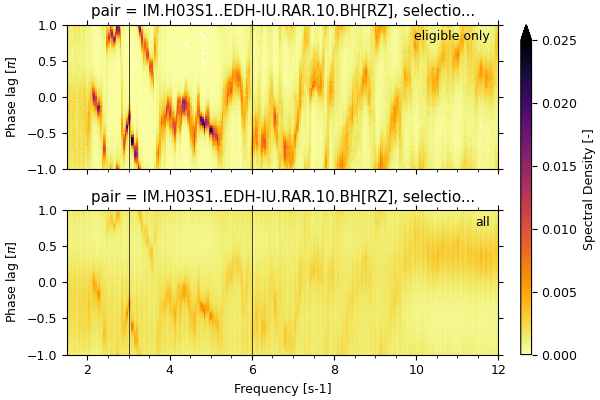

In [7]:
hydro_station = 'H03S1'

fig = plt.figure(constrained_layout=True, figsize=(6, 4))

gs = GridSpec(2, 2, figure=fig, height_ratios=(1, 1), width_ratios=(40, 1))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

pltargs = dict(x='frequency', y='phase', xlim=[1.5, 12.], ylim=[-1, 1], cmap='inferno_r', vmin=0, vmax=.025)
cbar_kwargs = dict(shrink=.45)

swresp.sel(pair=f"IM.{hydro_station}..EDH-IU.RAR.10.BH[RZ]", selection='eligible only').density.plot.imshow(**pltargs, ax=ax1, cbar_ax=ax3, extend='max', cbar_kwargs=cbar_kwargs)
ax1.set_ylabel(r'Phase lag [$\pi$]')
ax1.set_xlabel(None)
ax1.set_xticklabels([])
ax1.text(0.98, 0.96, 'eligible only', transform=ax1.transAxes, ha='right', va='top')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')

swresp.sel(pair=f"IM.{hydro_station}..EDH-IU.RAR.10.BH[RZ]", selection='all').density.plot.imshow(**pltargs, ax=ax2, add_colorbar=False)
ax2.set_ylabel(r'Phase lag [$\pi$]')
ax2.text(0.98, 0.96, 'all', transform=ax2.transAxes, ha='right', va='top')
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

for f in (3., 6.):
    ax1.plot(f*np.array([1, 1]), [-1, 1], '-', color="k", linewidth=.5)
    ax2.plot(f*np.array([1, 1]), [-1, 1], '-', color="k", linewidth=.5)

ax3.set_ylabel('Spectral Density [-]')

fig.savefig(f"figs/{hydro_station}_surface_wave_response.pdf", bbox_inches='tight', dpi=450)